In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
path = 'data/processed'
benchmarks_df = pd.read_csv(os.path.join(path, 'a_benchmarks_2024-09-11.csv'))
schools_df = pd.read_csv(os.path.join(path, 'a_schools_2024-08-29.csv'))
courseSections_df = pd.read_csv(os.path.join(path, 'a_courseSections_2024-08-29.csv'))
courseSectionRosters_df = pd.read_csv(os.path.join(path, 'a_courseSectionRosters_2024-08-29.csv'))
scores_df = pd.read_csv(os.path.join(path, 'a_scores_2024-09-11.csv'))
vendorUsage_df = pd.read_csv(os.path.join(path, 'a_vendorUsage_2024-09-11.csv'))

/var/folders/w3/z8qntdcx62v2qmj6z9fwfhrh0000gp/T/ipykernel_60307/4073666699.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  courseSectionRosters_df = pd.read_csv(os.path.join(path, 'a_courseSectionRosters_2024-08-29.csv'))


# label

## scores

In [4]:
# replace 0 with NaN
value_cols = [col for col in scores_df.columns if col.startswith('value_')]
scores_df[value_cols] = scores_df[value_cols].replace(0, np.nan)

# drop columns that only contain NaN
scores_df = scores_df.dropna(axis=1, how='all')

In [5]:
scores_df.dtypes

studentId                             int64
studentLevel                          int64
year                                  int64
measurementTypeId                     int64
subgroup_specialEd                    int64
subgroup_lunchStatus                  int64
subgroup_gender                       int64
subgroup_ethnicity                    int64
subgroup_ell                          int64
subgroup_bottom25                     int64
value_actMathScore                  float64
value_actEnglishScore               float64
value_actReadingScore               float64
value_actScienceScore               float64
value_actCompositeScore             float64
value_nweaMath                      float64
value_nweaReading                   float64
value_iReadyMath                    float64
value_iReadyReading                 float64
value_actMasteryComposite           float64
value_actMasteryReading             float64
value_actMasteryMath                float64
value_actMasteryScience         

In [6]:
# remove columns that only contain zeros
scores_df = scores_df.loc[:, (scores_df != 0).any()]
scores_df.shape

(303750, 58)

In [7]:
scores_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_SocialMilestones
0,44774,9,2018,6,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44774,8,2017,6,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44774,8,2017,4,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44775,8,2017,4,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44775,8,2017,6,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
print(f"specialEd {scores_df['subgroup_specialEd'].nunique()}")
print(f"lunchStatus {scores_df['subgroup_lunchStatus'].nunique()}")
print(f"gender {scores_df['subgroup_gender'].nunique()}")
print(f"ethnicity {scores_df['subgroup_ethnicity'].nunique()}")
print(f"ell {scores_df['subgroup_ell'].nunique()}")
print(f"bottom25 {scores_df['subgroup_bottom25'].nunique()}")


specialEd 6
lunchStatus 5
gender 5
ethnicity 5
ell 2
bottom25 2


In [10]:
# TODO map this to key

subgroups = ['subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25']

for subgroup in subgroups:
    print(f"\n{subgroup} value counts:")
    print(scores_df[subgroup].value_counts())
    print(f"Total unique values: {scores_df[subgroup].nunique()}")


subgroup_specialEd value counts:
subgroup_specialEd
0       290283
7         8212
6         4296
1          899
2           47
1000        13
Name: count, dtype: int64
Total unique values: 6

subgroup_lunchStatus value counts:
subgroup_lunchStatus
0    282087
1      9120
5      6268
6      6240
3        35
Name: count, dtype: int64
Total unique values: 5

subgroup_gender value counts:
subgroup_gender
0    289238
5      6422
6      6086
4      1774
3       230
Name: count, dtype: int64
Total unique values: 5

subgroup_ethnicity value counts:
subgroup_ethnicity
0     289238
18      8632
17      3876
10      1872
9        132
Name: count, dtype: int64
Total unique values: 5

subgroup_ell value counts:
subgroup_ell
0    303746
3         4
Name: count, dtype: int64
Total unique values: 2

subgroup_bottom25 value counts:
subgroup_bottom25
0    298640
1      5110
Name: count, dtype: int64
Total unique values: 2


In [11]:
# Filter scores_df to only include columns that are in benchmarks_df
benchmarks_list = list(benchmarks_df['dataSource'].unique())
value_cols = [col for col in scores_df.columns if col.startswith('value_')]
value_cols = [col for col in value_cols if col in benchmarks_list]
scores_df = scores_df[[col for col in scores_df.columns if col in value_cols or not col.startswith('value_')]]

In [12]:
# Count of available test scores by student level and dataSource
scores_count = pd.pivot_table(scores_df, values=value_cols, index='studentLevel', aggfunc='count')
scores_count = scores_count.fillna(0)
scores_count = scores_count.sort_index()

In [13]:
scores_count = scores_count[[col for col in scores_count.columns if col in benchmarks_list]]
scores_count
# scores_count.to_csv('scores_count.csv')

,value_actCompositeScore,value_actEnglishScore,value_actMathScore,value_actReadingScore,value_actScienceScore,value_scantronMath,value_scantronReading,value_starMath
studentLevel,,,,,,,,
-1,0,0,0,0,0,0,0,0
0,52,52,52,52,52,743,263,1
1,0,0,0,0,0,4257,1171,132
2,0,0,0,0,0,9091,5206,468
3,0,0,0,0,0,19893,19952,2075
4,0,0,0,0,0,20400,20036,2111
5,0,0,0,0,0,20317,20391,1969
6,2,2,2,2,2,19777,19914,1919
7,3,3,3,3,3,19277,19317,1728


In [14]:
scores_df.describe()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_scantronMath,value_scantronReading,value_starMath
count,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,5258.000000,5257.000000,5256.000000,5257.000000,5387.000000,138909.000000,135354.000000,12120.000000
mean,131440.302008,6.004998,2017.208234,2.757402,0.320174,0.256807,0.251562,0.793995,0.000040,0.016823,17.494675,17.194598,18.185502,17.958151,17.775758,2468.174891,2657.883387,2156.357096
std,57982.885934,5.916790,10.375606,1.281897,6.673339,1.104788,1.134392,3.593934,0.010887,0.128608,3.747356,5.663307,5.614616,4.653455,4.406411,292.296221,387.769632,731.353115
min,44774.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,3.000000,1.000000,1.000000,7.000000,1000.000000,1000.000000,170.000000
25%,85484.000000,4.000000,2017.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,13.000000,14.000000,15.000000,14.000000,2312.000000,2425.000000,2160.750000
50%,121078.000000,6.000000,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,16.000000,17.000000,18.000000,17.000000,2491.000000,2714.000000,2424.000000
75%,169950.000000,8.000000,2018.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,21.000000,22.000000,21.000000,20.375000,2651.000000,2943.000000,2594.000000
max,259514.000000,99.000000,2020.000000,7.000000,1000.000000,6.000000,6.000000,18.000000,3.000000,1.000000,36.000000,36.000000,36.000000,36.000000,35.000000,3700.000000,3700.000000,3247.000000


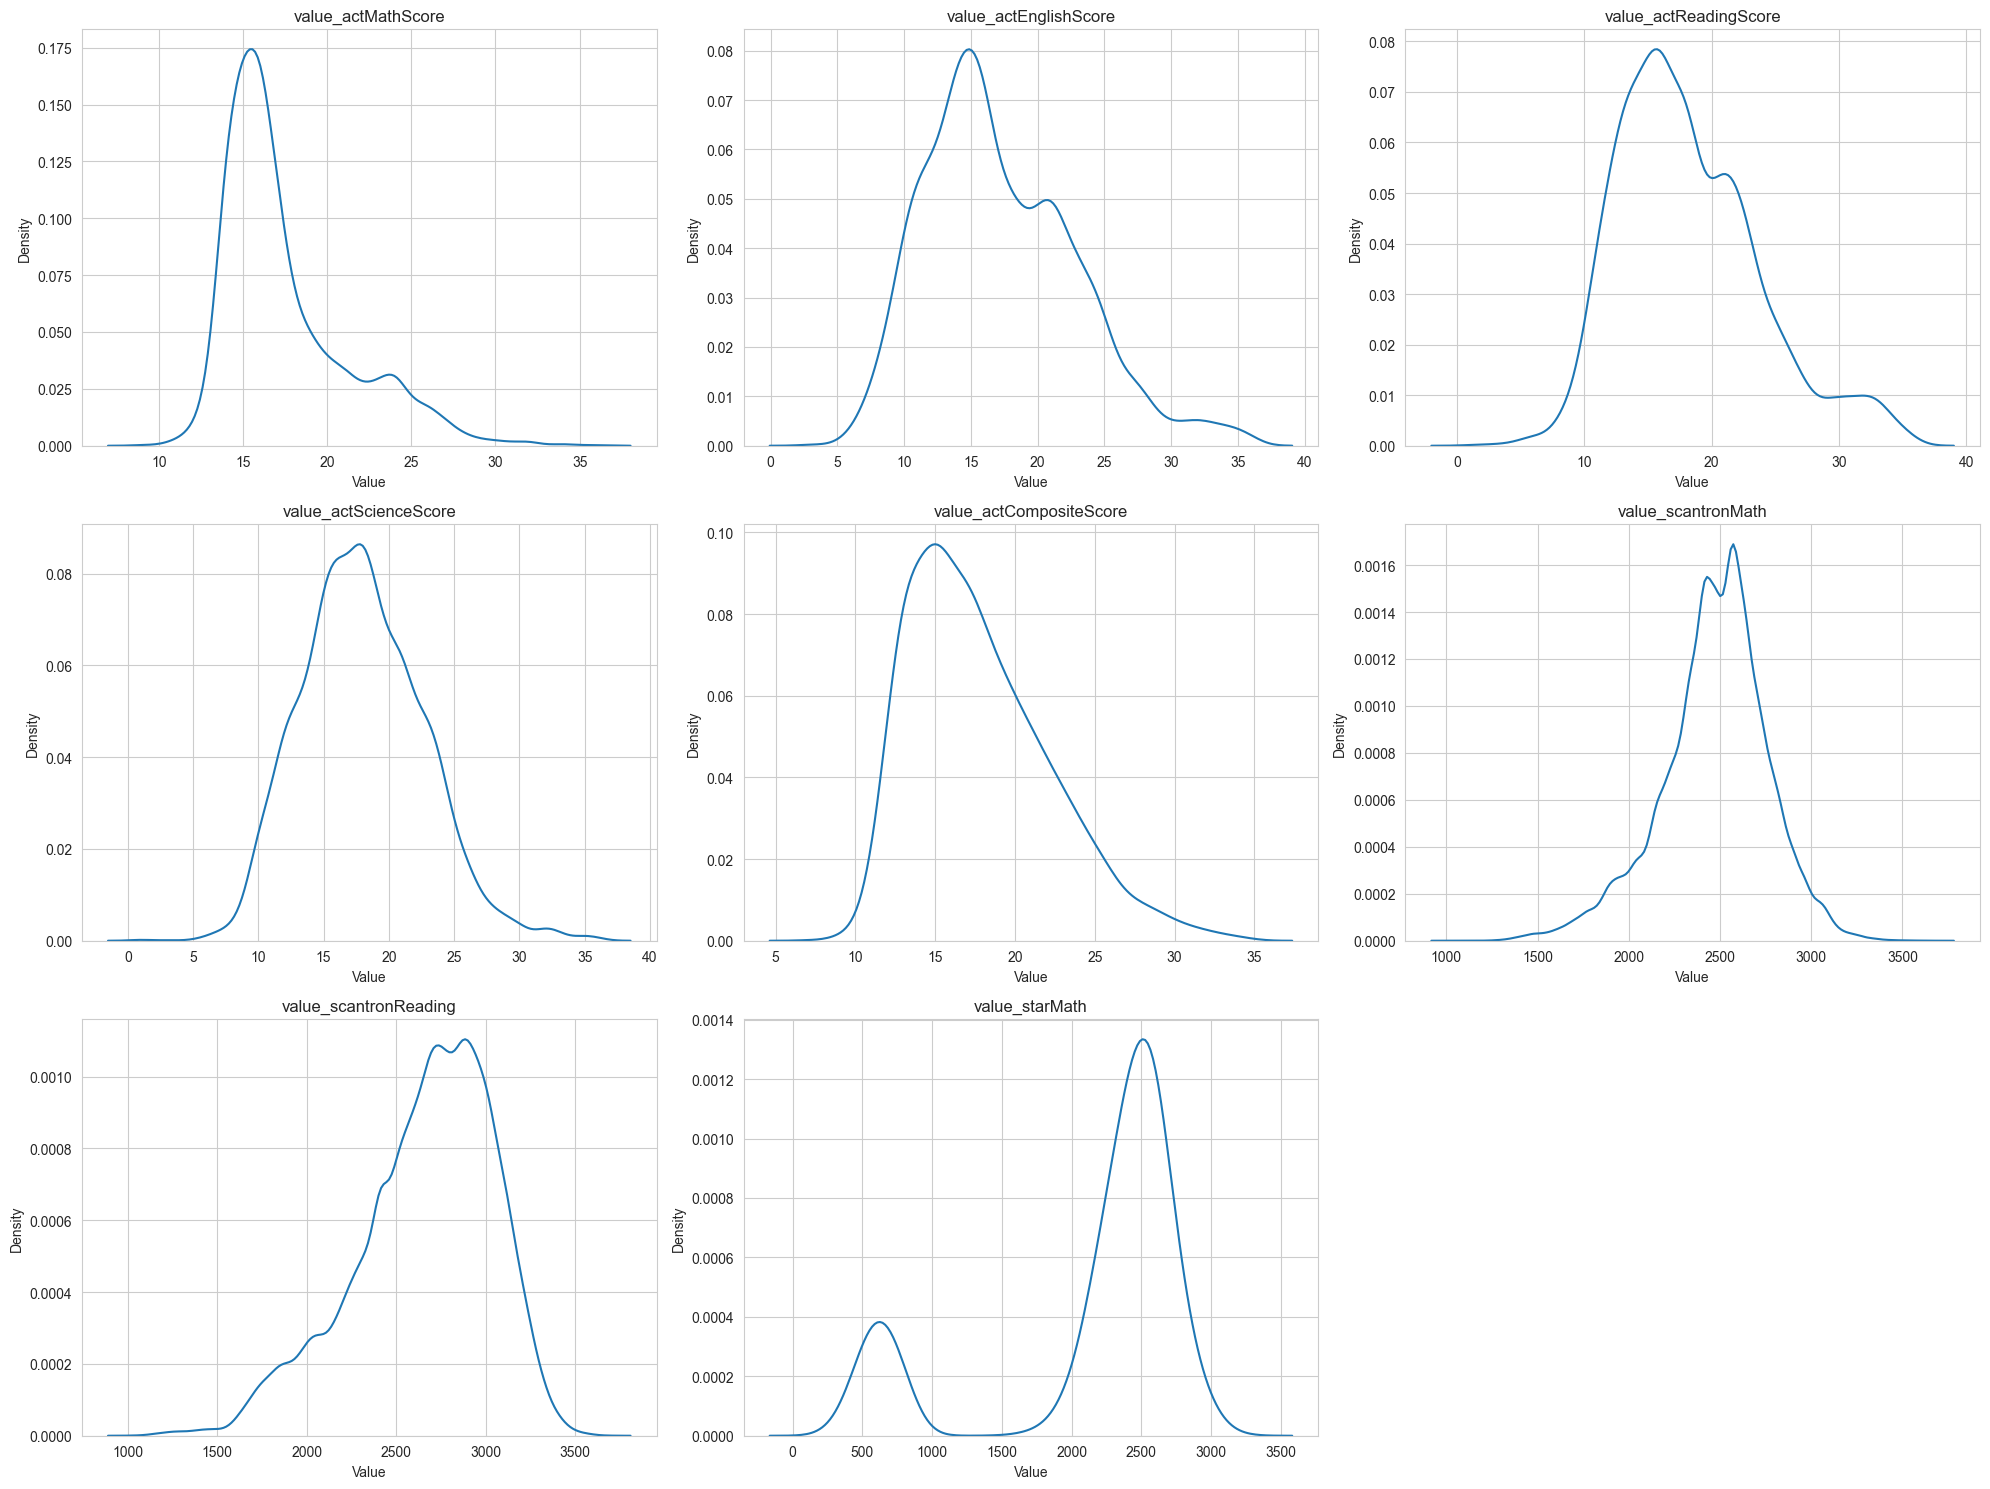

In [15]:
# Create a figure with subplots for each value column
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(value_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, column in enumerate(value_cols):
    # Remove rows with NaN values for the current column
    data = scores_df[column].dropna()
    
    # Plot KDE
    sns.kdeplot(data=data, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## benchmarks

In [16]:
print("benchmarks_df")
print(benchmarks_df.shape)
print(benchmarks_df.columns)

benchmarks_df
(42, 5)
Index(['districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')


In [17]:
benchmarks_df.rename(columns={'value': 'threshold'}, inplace=True)

In [18]:
benchmarks_df

,districtId,year,level,dataSource,threshold
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


## Create boolean proficiency label by merging scores_df and benchmarks_df

In [19]:
# Remove 'value_aspireReadingScaleScore' from benchmarks_list because it is not in scores_df
benchmarks_list.remove('value_aspireReadingScaleScore')
benchmarks_list

['value_scantronMath',
 'value_scantronReading',
 'value_actCompositeScore',
 'value_starMath',
 'value_actMathScore',
 'value_actReadingScore',
 'value_actEnglishScore',
 'value_actScienceScore']

In [20]:
# Step 1: Select only columns starting with 'value_' and keep 'studentId', 'studentLevel', 'year'
selected_columns = ['studentId', 'studentLevel', 'year'] + benchmarks_list
scores_subset = scores_df[selected_columns]
scores_subset.head()

,studentId,studentLevel,year,value_scantronMath,value_scantronReading,value_actCompositeScore,value_starMath,value_actMathScore,value_actReadingScore,value_actEnglishScore,value_actScienceScore
0,44774,9,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44774,8,2017,2841.0,2950.0,NaN,NaN,NaN,NaN,NaN,NaN
2,44774,8,2017,2808.0,2936.0,NaN,NaN,NaN,NaN,NaN,NaN
3,44775,8,2017,2580.0,2660.0,NaN,NaN,NaN,NaN,NaN,NaN
4,44775,8,2017,2705.0,2670.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Step 2: Melt the scores_subset to create a long format
scores_long = scores_subset.melt(
    id_vars=['studentId', 'studentLevel', 'year'], 
    var_name='dataSource', 
    value_name='score'
)

# Step 3: Rename 'studentLevel' to 'level' to match benchmarks_df
scores_long.rename(columns={'studentLevel': 'level'}, inplace=True)

# Step 4: Remove the 'value_' prefix from the dataSource column
# scores_long['dataSource'] = scores_long['dataSource'].str.replace('value_', '', regex=False)

# Step 5: Drop rows with NaN scores
scores_long.dropna(subset=['score'], inplace=True)

scores_long.head(20)

,studentId,level,year,dataSource,score
1,44774,8,2017,value_scantronMath,2841.0
2,44774,8,2017,value_scantronMath,2808.0
3,44775,8,2017,value_scantronMath,2580.0
4,44775,8,2017,value_scantronMath,2705.0
7,44776,8,2017,value_scantronMath,2335.0
8,44776,8,2017,value_scantronMath,2193.0
9,44777,6,2017,value_scantronMath,2493.0
10,44777,6,2017,value_scantronMath,2631.0
12,44777,7,2018,value_scantronMath,2585.0
13,44777,7,2018,value_scantronMath,2486.0


In [22]:
# Step 6: Merge the long-format scores with the benchmarks
proficiency_melted_df = pd.merge(
    scores_long, 
    benchmarks_df[['year', 'level', 'dataSource', 'threshold']], 
    on=['year', 'level', 'dataSource'], 
    how='left'
)

# Check for any missing values after the merge
missing_benchmarks = proficiency_melted_df['threshold'].isna().sum()
print(f"Number of scores without corresponding benchmark: {missing_benchmarks}")

proficiency_melted_df.dropna(subset=['threshold'], inplace=True)
proficiency_melted_df.head(10)

Number of scores without corresponding benchmark: 58641


,studentId,level,year,dataSource,score,threshold
0,44774,8,2017,value_scantronMath,2841.0,2823.0
1,44774,8,2017,value_scantronMath,2808.0,2823.0
2,44775,8,2017,value_scantronMath,2580.0,2823.0
3,44775,8,2017,value_scantronMath,2705.0,2823.0
4,44776,8,2017,value_scantronMath,2335.0,2823.0
5,44776,8,2017,value_scantronMath,2193.0,2823.0
6,44777,6,2017,value_scantronMath,2493.0,2675.0
7,44777,6,2017,value_scantronMath,2631.0,2675.0
8,44777,7,2018,value_scantronMath,2585.0,2743.0
9,44777,7,2018,value_scantronMath,2486.0,2743.0


In [23]:
# Step 7: Create the proficiency label
proficiency_melted_df['is_proficient'] = proficiency_melted_df['score'] >= proficiency_melted_df['threshold']
print(proficiency_melted_df.shape)
proficiency_melted_df.head(10)

(254157, 7)


,studentId,level,year,dataSource,score,threshold,is_proficient
0,44774,8,2017,value_scantronMath,2841.0,2823.0,True
1,44774,8,2017,value_scantronMath,2808.0,2823.0,False
2,44775,8,2017,value_scantronMath,2580.0,2823.0,False
3,44775,8,2017,value_scantronMath,2705.0,2823.0,False
4,44776,8,2017,value_scantronMath,2335.0,2823.0,False
5,44776,8,2017,value_scantronMath,2193.0,2823.0,False
6,44777,6,2017,value_scantronMath,2493.0,2675.0,False
7,44777,6,2017,value_scantronMath,2631.0,2675.0,False
8,44777,7,2018,value_scantronMath,2585.0,2743.0,False
9,44777,7,2018,value_scantronMath,2486.0,2743.0,False


In [24]:
# Step 8: Pivot the result back to wide format
proficiency_df = proficiency_melted_df.pivot_table(
    index=['studentId', 'level', 'year'],
    columns='dataSource',
    values='is_proficient'
)

# Reset the index to make 'studentId', 'level', and 'year' regular columns
proficiency_df.reset_index(inplace=True)

# Rename columns to indicate they are proficiency indicators
proficiency_df.rename(
    columns=lambda x: f'proficient_{x.replace("value_", "")}' if x not in ['studentId', 'level', 'year'] else x,
    inplace=True
)

# Merge the proficiency indicators back with the original scores_df
proficiency_df = pd.merge(scores_df, proficiency_df, 
                    left_on=['studentId', 'studentLevel', 'year'],
                    right_on=['studentId', 'level', 'year'],
                    how='left')

# Remove the redundant 'level' column from the merge
proficiency_df.drop('level', axis=1, inplace=True)

# Display the first few rows of the resulting DataFrame
proficiency_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_scantronMath,value_scantronReading,value_starMath,proficient_actCompositeScore,proficient_actEnglishScore,proficient_actMathScore,proficient_actReadingScore,proficient_actScienceScore,proficient_scantronMath,proficient_scantronReading,proficient_starMath
0,44774,9,2018,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44774,8,2017,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2841.0,2950.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN
2,44774,8,2017,4,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2808.0,2936.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN
3,44775,8,2017,4,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2580.0,2660.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,44775,8,2017,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2705.0,2670.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


/var/folders/w3/z8qntdcx62v2qmj6z9fwfhrh0000gp/T/ipykernel_60307/1020944851.py:3: RuntimeWarning: invalid value encountered in scalar divide
  col: lambda x: x.sum() / x.count() * 100


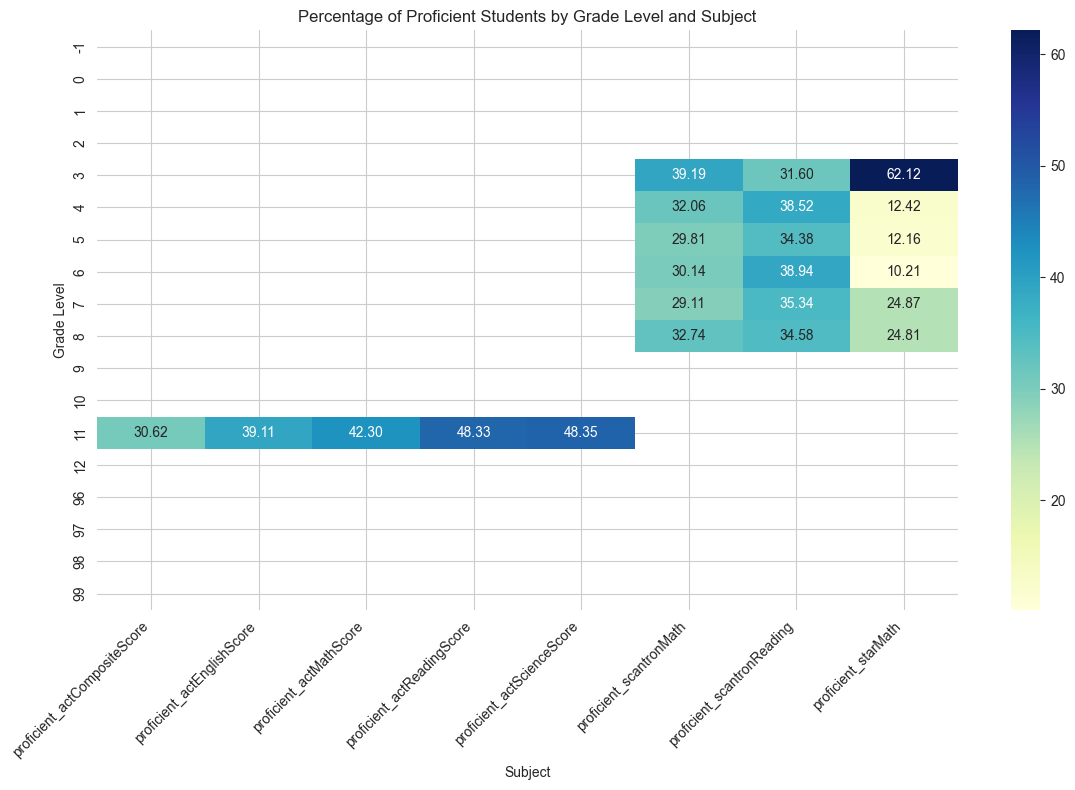

In [25]:
# Calculate the percentage of proficient students for each grade level and value
proficiency_percentage = proficiency_df.groupby('studentLevel').agg({
    col: lambda x: x.sum() / x.count() * 100
    for col in proficiency_df.columns if col.startswith('proficient_')
})

plt.figure(figsize=(12, 8))
sns.heatmap(proficiency_percentage, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Percentage of Proficient Students by Grade Level and Subject')
plt.xlabel('Subject')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Grade Level')
plt.tight_layout()
plt.show()


# Features

## subgroups

In [27]:
subgroups_df = scores_df[['studentId', 'studentLevel'] + subgroups]
subgroups_df = subgroups_df.drop_duplicates(subset='studentId')

subgroups_3_to_8 = subgroups_df[subgroups_df['studentLevel'].isin([3, 4, 5, 6, 7, 8])]
subgroups_11 = subgroups_df[subgroups_df['studentLevel'] == 11]

In [42]:
scores_df['subgroup_gender'].value_counts()

subgroup_gender
0    289238
5      6422
6      6086
4      1774
3       230
Name: count, dtype: int64

In [ ]:
ethnicity = {
    '1': 'White',
    '3': 'Black / African American',
    '4': 'Asian',
    '5': 'Hispanic Or Latino',
    '6': 'American Indian / Alaskan Native',
    '7': 'Multi Race - Two or More Races',
    '8': 'Native Hawaiian / Other Pacific Islander',
}


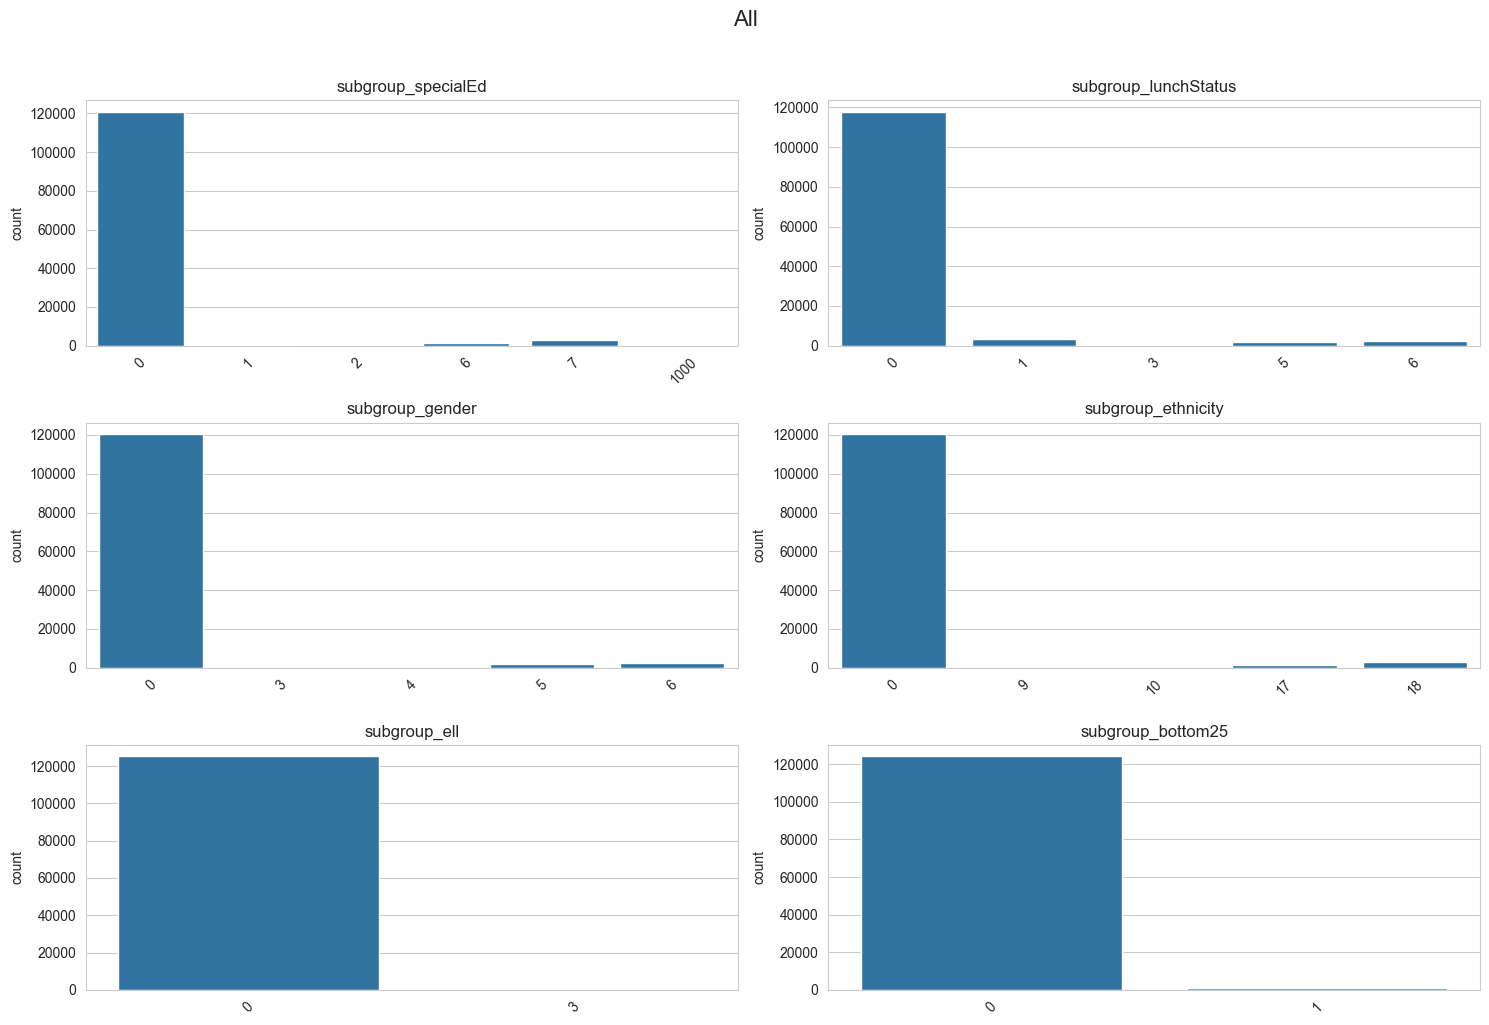

In [37]:
plt.figure(figsize=(15, 10))
plt.suptitle('All', fontsize=16, y=1.02)

for i, subgroup in enumerate(subgroups, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=subgroups_df.drop_duplicates(subset=['studentId']), x=subgroup)
    plt.title(f'{subgroup}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

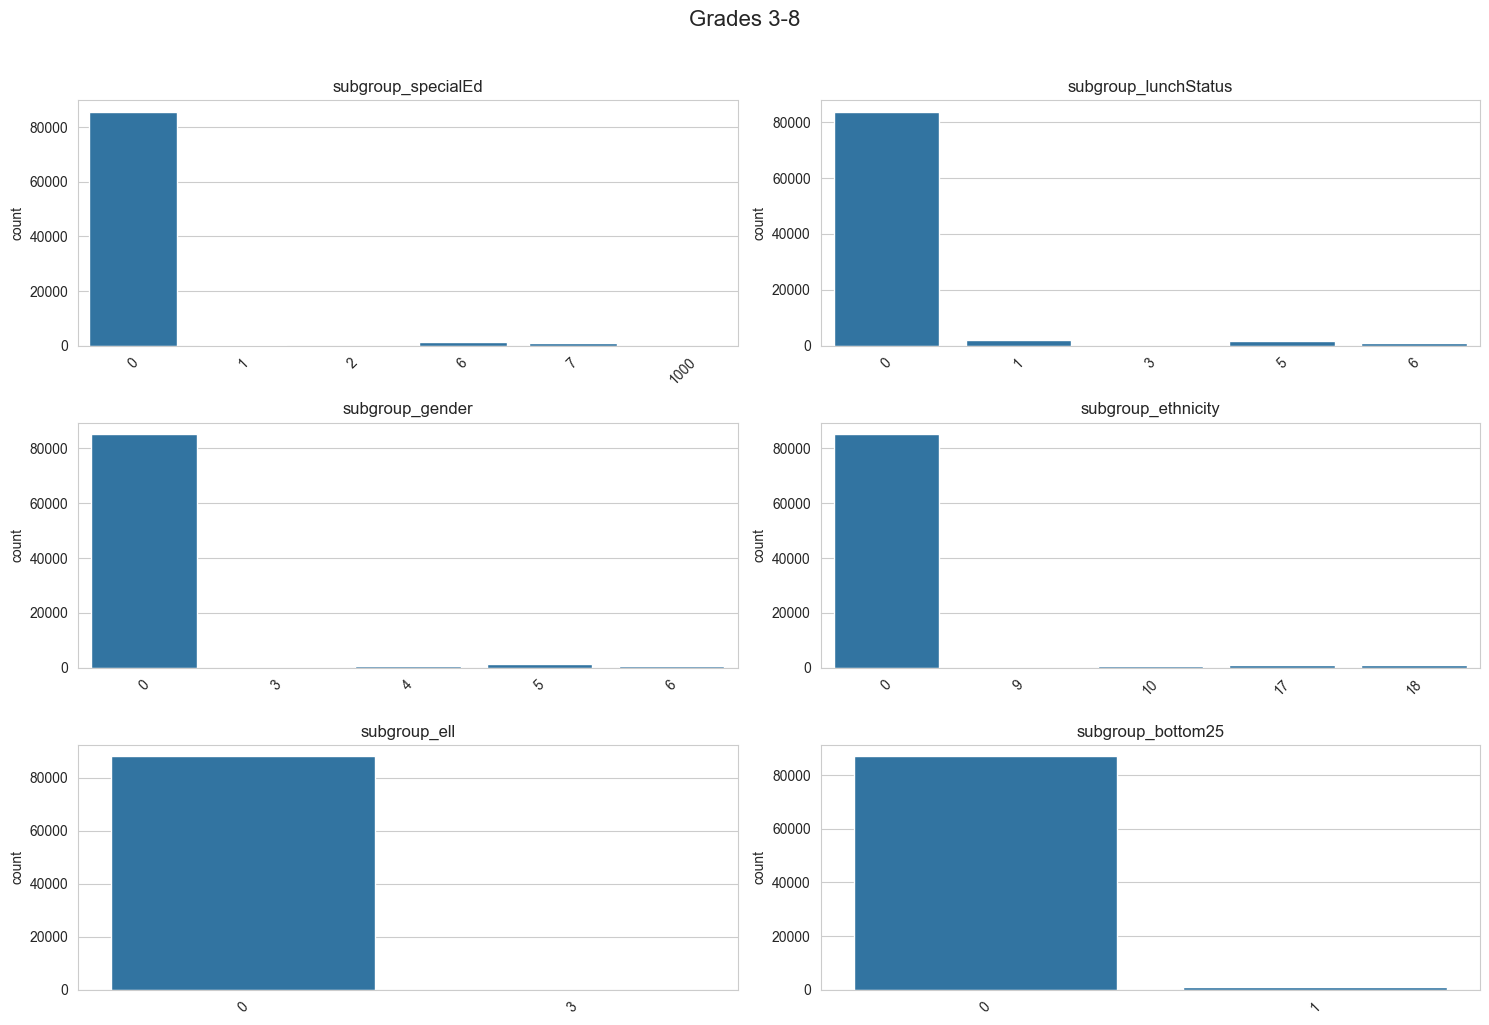

In [38]:
plt.figure(figsize=(15, 10))
plt.suptitle('Grades 3-8', fontsize=16, y=1.02)

for i, subgroup in enumerate(subgroups, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=subgroups_3_to_8, x=subgroup)
    plt.title(f'{subgroup}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

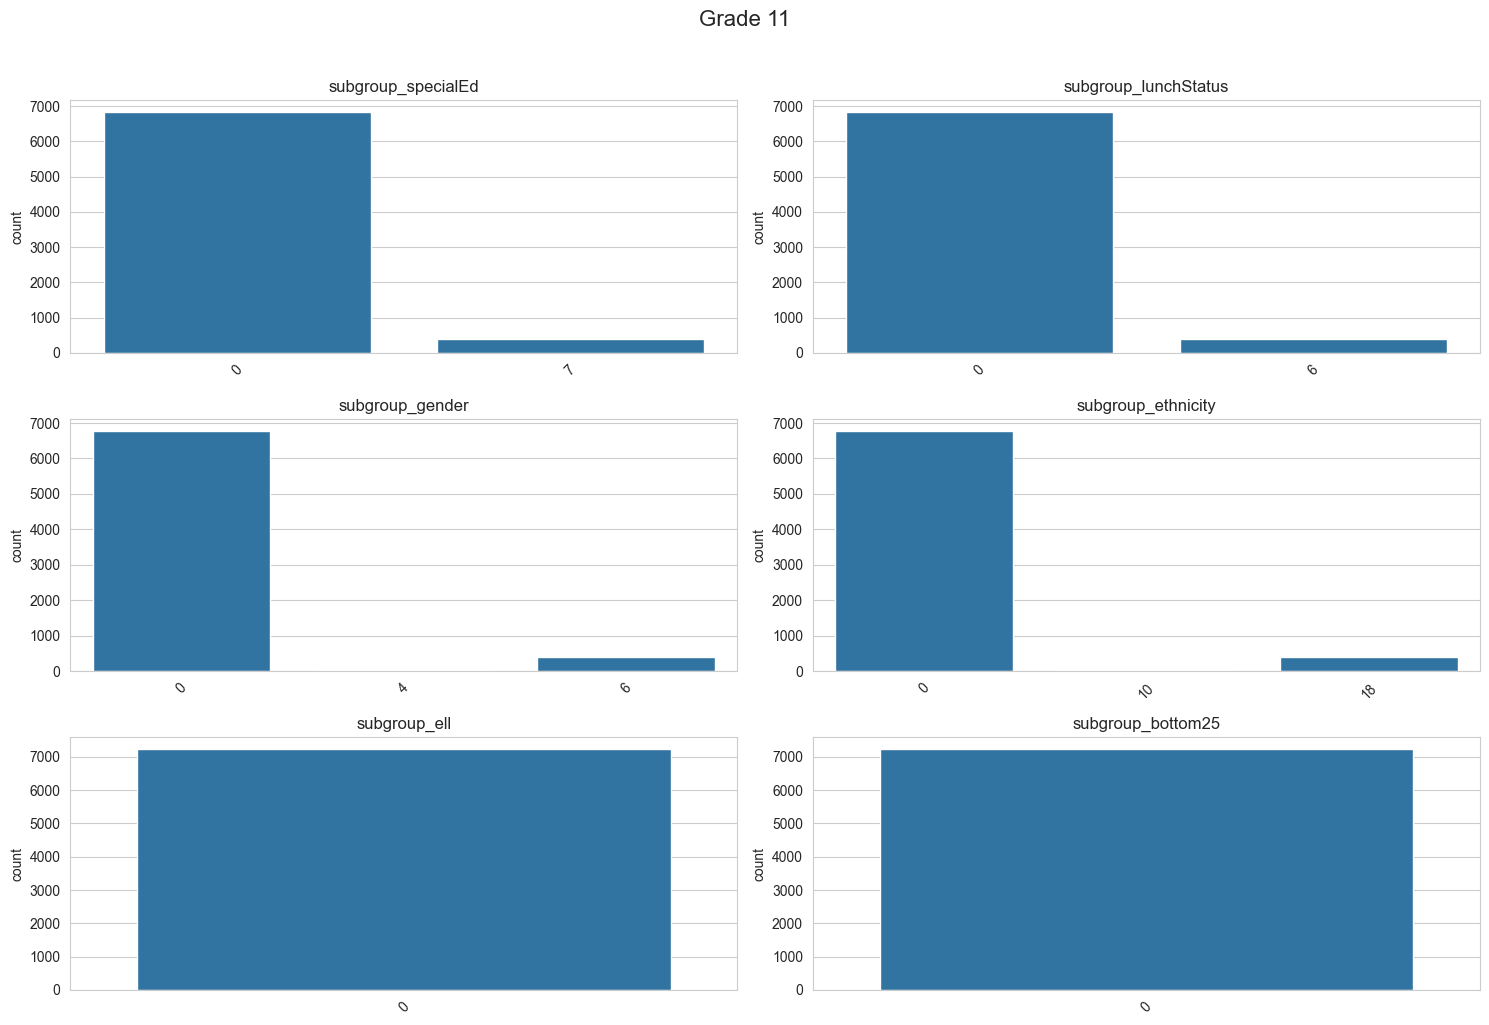

In [40]:
plt.figure(figsize=(15, 10))
plt.suptitle('Grade 11', fontsize=16, y=1.02)

for i, subgroup in enumerate(subgroups, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=subgroups_11, x=subgroup)
    plt.title(f'{subgroup}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

## schools

In [113]:
print("schools_df")
print(schools_df.shape)
print(schools_df.columns)

schools_df
(20, 8)
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')


In [114]:
schools_df

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,NaN,0
1,223,Middle School A,45,8,EMS,1,NaN,0
2,224,High School A,45,10,ECHS,1,NaN,0
3,225,Junior High B,45,12,ECJH,1,NaN,0
4,226,Elementary School B,45,18,HES,1,NaN,0
5,227,Middle School C,45,19,HMS,1,NaN,0
6,228,High School B,45,20,HHS,1,NaN,0
7,229,Middle School D,45,23,MJH,1,NaN,0
8,230,Elementary School C,45,30,RSE,1,NaN,0
9,231,Elementary School D,45,35,CES,1,NaN,0


## courseSections

In [115]:
print("courseSections_df")
print(courseSections_df.shape)
print(courseSections_df.columns)

courseSections_df
(17662, 4)
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')


In [116]:
courseSections_df.dtypes

id           int64
vanityId    object
year         int64
schoolId     int64
dtype: object

In [117]:
courseSections_df.head()

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


## courseSectionRosters

In [118]:
print("courseSectionRosters_df")
print(courseSectionRosters_df.shape)
print(courseSectionRosters_df.columns)

courseSectionRosters_df
(612241, 5)
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket'], dtype='object')


In [119]:
courseSectionRosters_df.dtypes

id                  int64
courseSectionId     int64
studentId           int64
studentLevel        int64
ticket             object
dtype: object

In [120]:
courseSectionRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,NaN
1,1047704,39975,56116,4,NaN
2,1047706,39975,45345,4,NaN
3,1047715,39975,45400,4,NaN
4,1047729,39975,45413,4,NaN


In [121]:
if 'vanityId' not in courseSectionRosters_df.columns:
    courseSectionRosters_df = pd.merge(courseSectionRosters_df, courseSections_df[['id', 'vanityId']], left_on='courseSectionId', right_on='id', how='left')
    courseSectionRosters_df = courseSectionRosters_df.drop(columns=['id_y'])
    courseSectionRosters_df = courseSectionRosters_df.rename(columns={'id_x': 'id'})

courseSectionRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket,vanityId
0,1047696,39975,45333,4,NaN,MathGrade 4
1,1047704,39975,56116,4,NaN,MathGrade 4
2,1047706,39975,45345,4,NaN,MathGrade 4
3,1047715,39975,45400,4,NaN,MathGrade 4
4,1047729,39975,45413,4,NaN,MathGrade 4


In [122]:
courseSectionRosters_df['studentLevel'].value_counts()

studentLevel
10    54246
9     52595
7     51315
1     49253
4     49171
8     48846
2     48820
12    47993
3     47529
11    47342
5     41209
6     40529
0     28458
99     2930
98     1290
97      670
96       45
Name: count, dtype: int64

In [123]:
list(courseSectionRosters_df['vanityId'].unique())

['MathGrade 4',
 'MathGrade 3',
 'SOC ST 4',
 'SCIENCE 4',
 'PE 4',
 'READING 4',
 'LANGUAGE 4',
 'SCIENCE 3',
 'SOC ST 3',
 'PE 3',
 'READING 3',
 'LANGUAGE 3',
 'AAS:Read-4',
 'AAS:Math-4',
 'AAS:Math-3',
 'AAS:Read-3',
 'PE 2',
 'SOC ST 2',
 'HOMEROOM',
 'SCIENCE 2',
 'LANGUAGE 2',
 'MATH 2',
 'READING 2',
 'PE 1',
 'READING 1',
 'SCIENCE 1',
 'LANGUAGE 1',
 'MATH 1',
 'SOC SCI 1',
 'READING K',
 'PE K',
 'HmroomPK6',
 'MATH 4',
 'MATH 3',
 'SOC ST 1',
 'Algebra IH',
 'MathGrade 5',
 'STUDY HALL',
 'Eng 8 H/Adv',
 'Advisory 8',
 'CONTISS 7-8',
 'WLDHIS H/Adv',
 'CareerPrep-A',
 'PhySci8H/Adv',
 'PE 8',
 'PhySci Gr 8',
 'MATH8 PREALG',
 'English Gr 8',
 'WLDHIS 1500',
 'ContIssu 7-8',
 'StuAide7-8NC',
 'English LA 5',
 'PE 5',
 'Science Gr 5',
 'SocialStuGr5',
 'Math6H/Adv',
 'SciGr6H/A',
 'ELAGrPK6H/Ad',
 'SoSt6H/A',
 'PE 6',
 'MATHINVET7-8',
 'MATH 7',
 'LANG ARTS 7',
 'PE 7',
 'SCIENCE LI 7',
 'Geog Gr7',
 'CivicsGr 7',
 'Advisory 7',
 'EnricMath78',
 'LifeSciH Gr7',
 'GeogH/AdvGr

In [147]:
# Group by vanityId (course name) and courseSectionId, then count students
course_sizes = courseSectionRosters_df.groupby(['vanityId', 'courseSectionId'])['studentId'].count().reset_index()

# Calculate average size for each course
average_course_sizes = pd.DataFrame(course_sizes.groupby('vanityId')['studentId'].mean().sort_values(ascending=False))

# Display the results
average_course_sizes.head(50)

,studentId
vanityId,
District Wide - IS,26829.750000
District Wide - ISS,26829.750000
District Wide - GA,11543.333333
Schoolwide -237sID,1490.750000
Schoolwide -229sID,1231.000000
Schoolwide -236sID,1182.000000
Schoolwide -233sID,1140.000000
Schoolwide -235sID,992.250000
Schoolwide -231sID,970.250000


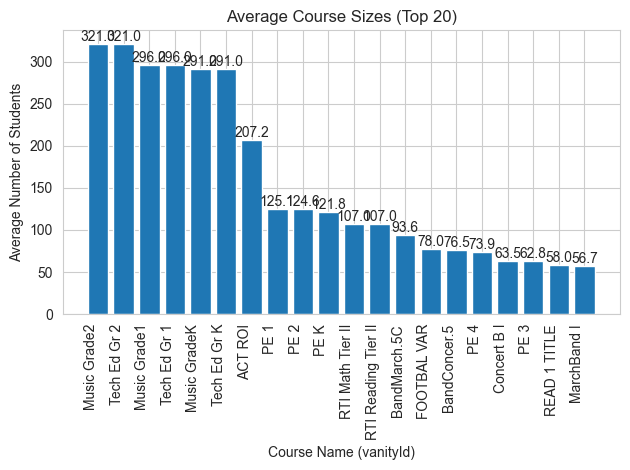

In [148]:
average_course_sizes_sorted = average_course_sizes.sort_values('studentId', ascending=False)

top_20_courses = average_course_sizes_sorted.iloc[16:36]

plt.bar(top_20_courses.index, top_20_courses['studentId'])

plt.title('Average Course Sizes (Top 20)')
plt.xlabel('Course Name (vanityId)')
plt.ylabel('Average Number of Students')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

for i, v in enumerate(top_20_courses['studentId']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

In [149]:
# print number of times each student appears
student_counts = scores_df['studentId'].value_counts()
print(student_counts)
print(student_counts.describe())

studentId
86584     7
86664     7
86590     7
86411     7
86669     7
         ..
204150    1
204151    1
204152    1
204153    1
259514    1
Name: count, Length: 125223, dtype: int64
count    125223.000000
mean          2.425673
std           1.471574
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: count, dtype: float64


## TODO vendors
check new lookup tables

In [162]:
vendorUsage_df.head()

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0


In [164]:
for col in vendorUsage_df.columns:
    print(f"{col}: {vendorUsage_df[col].nunique()}")

id: 158007
vendorId: 23
studentId: 44176
active: 1
year: 4
usageTypeId: 13
weeklyUsageMinutes: 1


In [165]:
vendorUsage_df['usageTypeId'].value_counts()

usageTypeId
4     50310
1     47620
3     21983
6     13381
2     10945
5      8014
9      1368
7      1173
12     1117
8       974
10      808
11      273
14       41
Name: count, dtype: int64

In [43]:
import json

In [49]:
vendorUsage_df['vendorId'].unique()

array([72609, 11333, 39195, 27172, 61673, 37017, 36130, 62382, 62509,
       62508, 37269, 25405, 52447, 52448, 61544,  7273, 63431, 63432,
       22410, 63616, 23165,  7035, 11464])

In [53]:
with open('data/raw/a_vendorKey_2024-10-08.csv', 'r') as file:
    vendorKey_json = json.loads(file.read())

In [54]:
vendorKey_df = pd.json_normalize(vendorKey_json['vendors'])
vendorKey_df

,id,name,districtId,vendorNumber,acqRequestSelectable
0,11105,National 4-H Council,45,9753,0
1,11106,National Resturant Association,45,8333,0
2,11107,Snap On Industrial,45,9606,0
3,11108,American Hotel & Lodging,45,9764,0
4,11109,SCHOOLMATE.COM,45,6582,0
...,...,...,...,...,...
1515,72618,Literacy Coach,45,6543434,1
1516,72619,Achieve 3000,45,5555555,1
1517,72620,"West Instructional Services, LLC",45,19,1
1518,72621,Discovery Education,45,34342,1


In [58]:
vendor_id = vendorUsage_df.merge(vendorKey_df[['id', 'name']], how='left', left_on='vendorId', right_on='id')
vendor_id.head()

,id_x,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes,id_y,name
0,11890,72609,44777,0,2018,1,0,72609.0,iReady Reading
1,11891,72609,44783,0,2018,1,0,72609.0,iReady Reading
2,11892,72609,44784,0,2018,1,0,72609.0,iReady Reading
3,11893,72609,44807,0,2018,1,0,72609.0,iReady Reading
4,11894,72609,44809,0,2018,1,0,72609.0,iReady Reading


In [62]:
vendorUsage_df.shape

(158007, 7)

In [61]:
vendor_id['name'].value_counts()

name
Curriculum Associates          46262
iReady Reading                  6794
BBB Educational Enterprises      567
Name: count, dtype: int64

# checking across dfs

In [167]:
print("benchmarks_df columns:")
print(benchmarks_df.columns)
print("\nschools_df columns:")
print(schools_df.columns)
print("\ncourseSections_df columns:")
print(courseSections_df.columns)
print("\ncourseSectionRosters_df columns:")
print(courseSectionRosters_df.columns)
print("\nscores_df columns:")
print(scores_df.columns)
print("\nvendorUsage_df columns:")
print(vendorUsage_df.columns)

benchmarks_df columns:
Index(['districtId', 'year', 'level', 'dataSource', 'threshold'], dtype='object')

schools_df columns:
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')

courseSections_df columns:
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')

courseSectionRosters_df columns:
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket',
       'vanityId'],
      dtype='object')

scores_df columns:
Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_iReadyMath', 'value_iReadyReading',
       'value_actMaster

In [168]:
scores_df['year'].value_counts()

year
2017    151911
2018    116297
2016     32949
2015      1220
2014       936
2020       429
0            8
Name: count, dtype: int64

In [169]:
print(f"benchmarks_df: {benchmarks_df['year'].unique()}")
print(f"courseSections_df: {courseSections_df['year'].unique()}")
print(f"scores_df: {scores_df['year'].unique()}") # most are between 2017-2018
print(f"vendorUsage_df: {vendorUsage_df['year'].unique()}")


benchmarks_df: [2017 2018]
courseSections_df: [2015 2017 2016 2018]
scores_df: [2018 2017 2020 2015 2016 2014    0]
vendorUsage_df: [2018 2017 2019 2020]


In [170]:
vendorStudents = set(vendorUsage_df['studentId'])
scoresStudents = set(scores_df['studentId'])
courseStudents = set(courseSectionRosters_df['studentId'])

# Find the number of students in all 3 sets
students_in_all_three = vendorStudents.intersection(scoresStudents, courseStudents)
print(f"Number of students in all three sets: {len(students_in_all_three)}")

# Find the number of students in any 2 sets
students_in_vendor_scores = vendorStudents.intersection(scoresStudents) - students_in_all_three
students_in_vendor_course = vendorStudents.intersection(courseStudents) - students_in_all_three
students_in_scores_course = scoresStudents.intersection(courseStudents) - students_in_all_three
print(f"Number of students in vendorUsage and scores only: {len(students_in_vendor_scores)}")
print(f"Number of students in vendorUsage and courseSectionRosters only: {len(students_in_vendor_course)}")
print(f"Number of students in scores and courseSectionRosters only: {len(students_in_scores_course)}")

# Find the number of students only in one set
vendor_only = vendorStudents - (scoresStudents.union(courseStudents))
scores_only = scoresStudents - (vendorStudents.union(courseStudents))
course_only = courseStudents - (vendorStudents.union(scoresStudents))
print(f"Number of students only in vendorUsage: {len(vendor_only)}")
print(f"Number of students only in scores: {len(scores_only)}")
print(f"Number of students only in courseSectionRosters: {len(course_only)}")



Number of students in all three sets: 7969
Number of students in vendorUsage and scores only: 29503
Number of students in vendorUsage and courseSectionRosters only: 331
Number of students in scores and courseSectionRosters only: 4241
Number of students only in vendorUsage: 6373
Number of students only in scores: 83510
Number of students only in courseSectionRosters: 4326


# master df

In [173]:
benchmarks_df.head()

,districtId,year,level,dataSource,threshold
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0


### proficiency_melted_df

In [182]:
print(proficiency_melted_df['level'].value_counts())
print()
print(proficiency_melted_df['year'].value_counts())


level
5     41685
4     41551
3     40824
6     40595
7     39355
8     38861
11    11286
Name: count, dtype: int64

year
2018    129482
2017    124675
Name: count, dtype: int64


In [184]:
level_year_counts = proficiency_melted_df.groupby(['level', 'year']).size().unstack(fill_value=0)
print(level_year_counts)

year    2017   2018
level              
3      20976  19848
4      20903  20648
5      20820  20865
6      20558  20037
7      19571  19784
8      19589  19272
11      2258   9028


In [186]:
level_dataSource_counts = proficiency_melted_df.groupby(['level', 'dataSource']).size().unstack(fill_value=0)
level_dataSource_counts

dataSource,value_actCompositeScore,value_actEnglishScore,value_actMathScore,value_actReadingScore,value_actScienceScore,value_scantronMath,value_scantronReading,value_starMath
level,,,,,,,,
3,0,0,0,0,0,19345,19404,2075
4,0,0,0,0,0,19902,19538,2111
5,0,0,0,0,0,19868,19848,1969
6,0,0,0,0,0,19327,19349,1919
7,0,0,0,0,0,18846,18781,1728
8,0,0,0,0,0,18565,18588,1708
11,4063,1806,1806,1805,1806,0,0,0


# Predicting ACT scores for level 11

In [187]:
act_11_df = proficiency_melted_df[proficiency_melted_df['level'] == 11]

# Merge subgroup columns from scores_df into act_11_df
subgroup_columns = ['subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25']
act_11_df = act_11_df.merge(scores_df[['studentId'] + subgroup_columns], on='studentId', how='left')

act_11_df.head()

,studentId,level,year,dataSource,score,threshold,is_proficient
1,45054,11,2018,value_actMathScore,9.0,17.0,False
4,45440,11,2018,value_actMathScore,16.0,17.0,False
8,45953,11,2018,value_actMathScore,17.0,17.0,True
11,46042,11,2018,value_actMathScore,17.0,17.0,True
12,46042,11,2018,value_actMathScore,18.0,17.0,True


In [189]:
act_11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22862 entries, 0 to 22861
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   studentId             22862 non-null  int64  
 1   level                 22862 non-null  int64  
 2   year                  22862 non-null  int64  
 3   dataSource            22862 non-null  object 
 4   score                 22862 non-null  float64
 5   threshold             22862 non-null  float64
 6   is_proficient         22862 non-null  bool   
 7   subgroup_specialEd    22862 non-null  int64  
 8   subgroup_lunchStatus  22862 non-null  int64  
 9   subgroup_gender       22862 non-null  int64  
 10  subgroup_ethnicity    22862 non-null  int64  
 11  subgroup_ell          22862 non-null  int64  
 12  subgroup_bottom25     22862 non-null  int64  
dtypes: bool(1), float64(2), int64(9), object(1)
memory usage: 2.1+ MB


In [1]:
# TODO make separate notebook with data processing + training model

In [192]:
# Merge act_11_df with courseSectionRosters_df to get course_ids for each student
act_11_courses = act_11_df.merge(courseSectionRosters_df[['studentId', 'courseSectionId']], 
                                 on='studentId', how='left')

# Merge with courseSections to get vanityId
act_11_courses = act_11_courses.merge(courseSections_df[['id', 'vanityId']], 
                                      left_on='courseSectionId', right_on='id', how='left')

# Create binary features for each unique course vanityId
course_dummies = pd.get_dummies(act_11_courses['vanityId'], prefix='course')

# Aggregate the binary features by studentId
act_11_courses_grouped = course_dummies.groupby(act_11_courses['studentId']).max()

# Merge the binary course features back to act_11_df
act_11_df = act_11_df.merge(act_11_courses_grouped, on='studentId', how='left')

# Fill NaN values with 0 (students not enrolled in a course)
act_11_df = act_11_df.fillna(0)

# Display the first few rows to verify the result
print(act_11_df[['studentId'] + list(course_dummies.columns)].head())


   studentId  course_3-D Solid I  course_ACT REVIEW  course_ACT ROI  \
0      45054               False              False            True   
1      45054               False              False            True   
2      45440               False              False           False   
3      45440               False              False           False   
4      45440               False              False           False   

   course_ACT Review  course_ACT/WK Rev.  course_ACTReview 1C  \
0              False               False                False   
1              False               False                False   
2              False               False                False   
3              False               False                False   
4              False               False                False   

   course_ACTReview.5C  course_AG Communica  course_AIDE-ELEM  \
0                False                False             False   
1                False                False         